In [29]:
import numpy as np
import numpy.matlib
import math
import matplotlib.pyplot as plt
from math import floor, ceil
import random 

In [30]:
red=np.loadtxt('RedWine_HW7.txt')
print(len(red),len(red[0]))
white=np.loadtxt('WhiteWine_HW7.txt')
print(len(white),len(white[0]))

1599 13
4898 13


In [31]:
fish=np.zeros((1,len(red[0]))) #用来储存Fisher ratio
result=np.zeros((2,len(red[0])))  #第一行按被选顺序储存feature 序号，第二行储存对应featuer的fisher ratio
inter=[]  #存放已经被选取的feature
print(len(inter))
n=len(red[0])
t=0.02

0


In [32]:
while n!=0: #看feature被选完没
    rs=np.zeros((len(red),0))#空的列向量
    ws=np.zeros((len(white),0))
    for k in range(len(inter)):
        rs=np.hstack((rs,np.mat(red[:,inter[k]]).T)) #在选取下一个feature之前，先把已被选取的feature对应的data合并进来
        ws=np.hstack((ws,np.mat(white[:,inter[k]]).T))
    for i in range (len(red[0])):
        if (i in inter)==True:  #由于原数据 red、white 没有减去选了的feature，所以需要跳过选了的feature
            continue
        else:
            m1=np.hstack((ws,np.mat(white[:,i]).T))  #np.mat(white[:,i]).T是列向量，所有选过了的feature加上当前的这个没选的feature，求一个fisher ratio
            m2=np.hstack((rs,np.mat(red[:,i]).T))
            a=np.vstack((m2,m1)) #v是纵向拼接，h是横向拼接
            mur=np.mean(m2,axis=0)
            muw=np.mean(m1,axis=0)
            mua=np.mean(a,axis=0)
            sm=((a-np.tile(mua,(len(a),1))).T)@(a-np.tile(mua,(len(a),1)))/len(a)
            sw1=((m2-np.tile(mur,(len(red),1))).T)@((m2-np.tile(mur,(len(red),1))))/len(red)
            sw=sw1+((m1-np.tile(muw,(len(white),1))).T)@((m1-np.tile(muw,(len(white),1))))/len(white)
            fi=sm/(sw+t*np.eye((len(sw))))
            i1=0
            for j in range(len(fi)):  #求trace
                i1=i1+fi[j,j]
            fish[0,i]=i1  #选取一个feature，需要把所有还没被选的feature 的fisher ratio计算出来
    po=np.argmax(fish) #返回fisher ratio最大值的index。
    print(po)
    inter.append(po)
    result[0,len(red[0])-n]=po #顺序储存，先被选的放前面
    result[1,len(red[0])-n]=fish[0,po]
    #fisher ratio置零，以便储存选取下一个feature时计算出的fisher ratio
    #那么已经选过的feature因为在for的最开始会跳过，所以对应fisher ratio为0，不影响fish中max的选取
    fish=np.zeros((1,len(red[0]))) 
    n=n-1  #一个

6
3
5
10
11
12
0
1
8
9
2
4
7


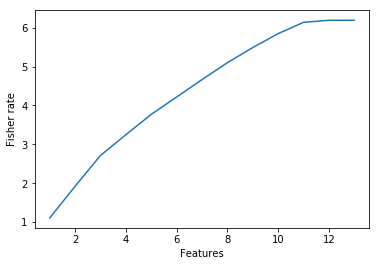

In [27]:
ra=result[1,:] #随着被选的feature数量增大， fisher ratio增大
x=[1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(x,ra)
plt.ylabel('Fisher rate') 
plt.xlabel('Features')
plt.show()

In [ ]:
ratio1 = final_matrix(2,:);
ratio2 = ratio1(2:end);
dif = ratio2-ratio1(1:end-1);
% figure;
% semilogy(ratio1);hold on
figure;plot(ratio1);hold on
scatter(1:13,ratio1,'LineWidth',1.5);
grid on
grid minor
% plot(ratio1);
figure;
plot(dif);
grid on
grid minor